In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob
import random
np.random.seed(0)
random.seed(0)

# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [2, 10, 20, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, memory=m, minorant_update='drop_constr', print_freq=10)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 2
k=0, rel_gap=inf, L=0.0, U=7.5021890138009475, L0=0.0
k=10, rel_gap=inf, L=0.0, U=0.05192831164045041, L0=0.0
k=20, rel_gap=inf, L=0.0, U=0.0001690536663644311, L0=0.0
memory = 10
k=0, rel_gap=inf, L=0.0, U=7.5021890138009475, L0=0.0
k=10, rel_gap=inf, L=0.0, U=0.051928303406267626, L0=0.0
k=20, rel_gap=inf, L=0.0, U=0.00016899408506593913, L0=0.0
memory = 20
k=0, rel_gap=inf, L=0.0, U=7.5021890138009475, L0=0.0
k=10, rel_gap=inf, L=0.0, U=0.051928303406267626, L0=0.0
k=20, rel_gap=inf, L=0.0, U=0.00016899781115887279, L0=0.0
memory = 30
k=0, rel_gap=inf, L=0.0, U=7.5021890138009475, L0=0.0
k=10, rel_gap=inf, L=0.0, U=0.051928303406267626, L0=0.0
k=20, rel_gap=inf, L=0.0, U=0.00016899781115887279, L0=0.0


# Centralized solution

In [5]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

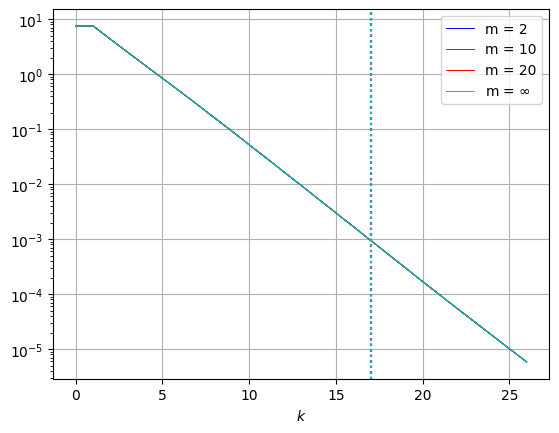

In [6]:
ob.plot_finite_memory_abs(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)